<a href="https://colab.research.google.com/github/LindsClar/Capstone_2/blob/main/Storytelling_gun_violence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

I decided to explore a dataset related to an issue that deeply impacts many in the United States: gun violence. We often hear about gang violence, shootings, and mass shootings in the news, so I chose to analyze a dataset that documents gun violence across the U.S.

Next, I aim to examine how safe California, the state I live in, is compared to others.

Hypothesis: Due to California's size and the dense populations in its cities, I believe the state accounts for a significant portion of gun violence incidents in the U.S.

Dataset: https://www.kaggle.com/datasets/whisperingkahuna/gunviolence1/code


In [1]:
#import libraries
import pandas as pd
import numpy as np

#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the CSV file
df = pd.read_csv('/content/Gun_violence_with_coordinates.csv')

Let's visualize the data.


In [3]:
df.head(5)

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude,Coordinates_Found
0,3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,NaN,47.56812,-121.89086,Yes
1,3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,NaN,35.61390,-88.81940,Yes
2,3051984,"October 20, 2024",Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,NaN,30.44335,-91.18664,Yes
3,3051041,"October 19, 2024",Pennsylvania,Philadelphia,2517 N Jessup St,0,7,0,0,0,NaN,39.95222,-75.16218,Yes
4,3050940,"October 19, 2024",Mississippi,Lexington,24904 MS-17,3,8,0,0,0,NaN,33.11464,-90.05281,Yes


In [4]:
df.shape

(427, 14)

Looks like th data has 427 rows and 14 Columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Incident ID        427 non-null    int64  
 1   Incident Date      427 non-null    object 
 2   State              427 non-null    object 
 3   City Or County     427 non-null    object 
 4   Address            426 non-null    object 
 5   Victims Killed     427 non-null    int64  
 6   Victims Injured    427 non-null    int64  
 7   Suspects Killed    427 non-null    int64  
 8   Suspects Injured   427 non-null    int64  
 9   Suspects Arrested  427 non-null    int64  
 10  Operations         0 non-null      float64
 11  Latitude           427 non-null    float64
 12  Longitude          427 non-null    float64
 13  Coordinates_Found  427 non-null    object 
dtypes: float64(3), int64(6), object(5)
memory usage: 46.8+ KB


In [6]:
df.describe()

,Incident ID,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations,Latitude,Longitude
count,4.270000e+02,427.000000,427.000000,427.000000,427.000000,427.000000,0.0,427.000000,427.000000
mean,2.929432e+06,1.000000,4.437939,0.070258,0.063232,0.711944,NaN,36.941819,-88.791959
std,6.876031e+04,1.210285,2.849555,0.264896,0.271030,1.178414,NaN,4.934289,12.976850
min,2.791411e+06,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,21.449910,-166.739450
25%,2.879320e+06,0.000000,3.000000,0.000000,0.000000,0.000000,NaN,33.449545,-91.910580
50%,2.939030e+06,1.000000,4.000000,0.000000,0.000000,0.000000,NaN,37.687490,-86.811790
75%,2.982807e+06,1.000000,5.000000,0.000000,0.000000,1.000000,NaN,40.692450,-80.735325
max,3.052758e+06,8.000000,28.000000,2.000000,2.000000,7.000000,NaN,68.349440,-70.256650


I notice that operations has a lot of NaN and I'm unsure originally what it's from. I checked the original dataset and I'm not finding any details on it and went furthere to the fun violence archive website to inspect operations.

https://www.gunviolencearchive.org/incident/3083179

Looks like operations details where the information comes from either by the news or from the government reporting the information. A User can view the overall characteristics and source material.

Double checking the missing values for other columns that may be missing information other than operations.

In [7]:
df.isnull().sum()

,0
Incident ID,0
Incident Date,0
State,0
City Or County,0
Address,1
Victims Killed,0
Victims Injured,0
Suspects Killed,0
Suspects Injured,0
Suspects Arrested,0


In [8]:
df.nunique()

,0
Incident ID,427
Incident Date,188
State,43
City Or County,235
Address,426
Victims Killed,8
Victims Injured,21
Suspects Killed,3
Suspects Injured,3
Suspects Arrested,8


In [9]:
#decided to drop the Operations column
df.head()

df.drop('Operations', axis=1, inplace=True)

In [10]:
#checking the df
df.head()

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Latitude,Longitude,Coordinates_Found
0,3052758,"October 21, 2024",Washington,Fall City,7700 block of Lake Alice Rd SE,5,1,0,0,1,47.56812,-121.89086,Yes
1,3052028,"October 20, 2024",Tennessee,Jackson,2310 N Highland Ave,1,8,0,0,0,35.61390,-88.81940,Yes
2,3051984,"October 20, 2024",Louisiana,Baton Rouge,9700 block of Greenwell Springs Rd,0,5,0,0,0,30.44335,-91.18664,Yes
3,3051041,"October 19, 2024",Pennsylvania,Philadelphia,2517 N Jessup St,0,7,0,0,0,39.95222,-75.16218,Yes
4,3050940,"October 19, 2024",Mississippi,Lexington,24904 MS-17,3,8,0,0,0,33.11464,-90.05281,Yes


In [11]:
df.duplicated().sum()

0

In [12]:
#importing US worked originally and then later the error started being thrown so I'm doing it long way
#import us

#changing state to abreviations
#df['State'] = df['State'].apply(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else None)

In [13]:
state_abbr = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'District of Columbia': 'DC',
    'United States Virgin Islands': 'VI'
}

df['State'] = df['State'].map(state_abbr)

In [14]:
#for efficiency I'm renaming the column of city and county to just city
df.rename(columns={'City Or County': 'City'}, inplace=True)


In [15]:
#checking the type of data
df.dtypes

#convert to datetime
if 'Incident Date' in df.columns:
    df['Incident Date'] = pd.to_datetime(df['Incident Date'], errors='coerce')

    df['Date'] = (df['Incident Date'] - df['Incident Date'].min()).dt.days

print(df.head())

   Incident ID Incident Date State          City  \
0      3052758    2024-10-21    WA     Fall City   
1      3052028    2024-10-20    TN       Jackson   
2      3051984    2024-10-20    LA   Baton Rouge   
3      3051041    2024-10-19    PA  Philadelphia   
4      3050940    2024-10-19    MS     Lexington   

                              Address  Victims Killed  Victims Injured  \
0      7700 block of Lake Alice Rd SE               5                1   
1                 2310 N Highland Ave               1                8   
2  9700 block of Greenwell Springs Rd               0                5   
3                    2517 N Jessup St               0                7   
4                         24904 MS-17               3                8   

   Suspects Killed  Suspects Injured  Suspects Arrested  Latitude  Longitude  \
0                0                 0                  1  47.56812 -121.89086   
1                0                 0                  0  35.61390  -88.81940   
2 

In [16]:
numeric_df = df.select_dtypes(include=[np.number])
print(numeric_df.head())

   Incident ID  Victims Killed  Victims Injured  Suspects Killed  \
0      3052758               5                1                0   
1      3052028               1                8                0   
2      3051984               0                5                0   
3      3051041               0                7                0   
4      3050940               3                8                0   

   Suspects Injured  Suspects Arrested  Latitude  Longitude  Date  
0                 0                  1  47.56812 -121.89086   294  
1                 0                  0  35.61390  -88.81940   293  
2                 0                  0  30.44335  -91.18664   293  
3                 0                  0  39.95222  -75.16218   292  
4                 0                  0  33.11464  -90.05281   292  


# Visualize

In [17]:
per_state = df['State'].value_counts()
per_state

,count
State,
IL,32
CA,28
PA,27
TX,26
FL,25
MO,21
AL,21
MS,20
GA,19


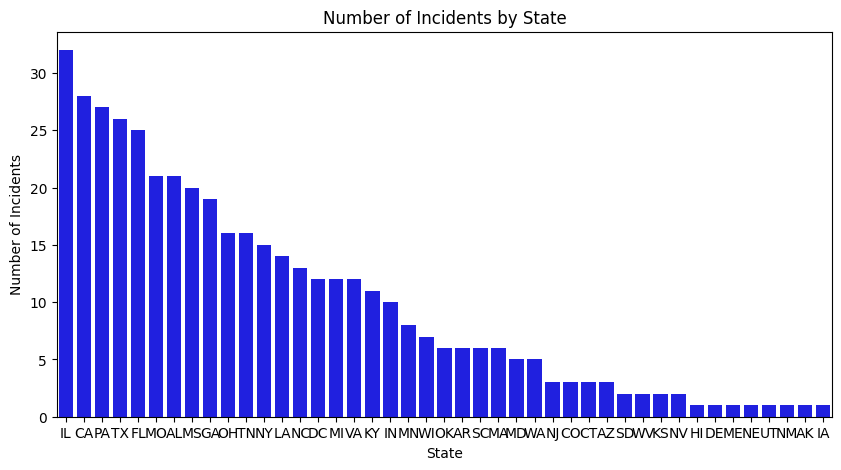

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=per_state.index, y=per_state, color='blue')
plt.title('Number of Incidents by State')
plt.xlabel('State')
plt.ylabel('Number of Incidents')
plt.show()

By simply observing the bar graph, I was able to confirm my hypothesis that California has the second-highest amount of gun violence.

It's honestly disturbing to see the extent of gun violence present.

Now, let's take a look at how many people generally die in each event per state.

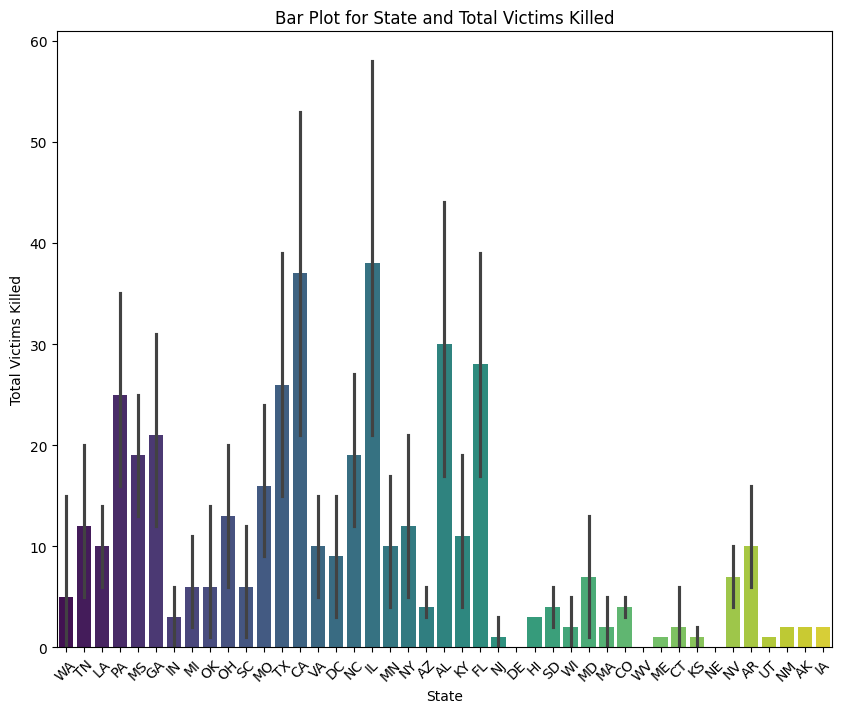

In [34]:
plt.figure(figsize=(10, 8))

#bar plot
sns.barplot(x="State", y="Victims Killed", data=df, palette='viridis', estimator=sum)

plt.title('Bar Plot for State and Total Victims Killed')
plt.xlabel('State')
plt.ylabel('Total Victims Killed')
plt.xticks(rotation=45)
plt.show()

In [20]:
#now lets look at the dealth near me in CA
ca_df = df[df['State'] == 'CA']
ca_df

,Incident ID,Incident Date,State,City,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Latitude,Longitude,Coordinates_Found,Date
16,3040192,2024-10-04,CA,Redding,6438 Westside Rd,2,3,0,0,1,40.58762,-122.39249,Yes,277
23,3033981,2024-09-25,CA,Los Angeles,449 W 74th St,0,6,0,0,4,34.05357,-118.24545,Yes,268
56,3009463,2024-08-29,CA,Tulare,Martin Luther King Jr Ave and S St,0,4,0,0,0,36.20649,-119.34305,Yes,241
76,2997932,2024-08-17,CA,Oakland,1618 83rd Ave,2,2,0,0,1,37.80508,-122.27307,Yes,229
97,2986409,2024-08-04,CA,Oakland,Fruitvale Ave and MacArthur Blvd,0,5,0,0,0,37.80508,-122.27307,Yes,216
113,2981325,2024-07-28,CA,Los Angeles,E 51st St and Avalon Blvd,0,4,0,0,0,34.05357,-118.24545,Yes,209
123,2973281,2024-07-20,CA,Vista,Civic Center Dr,1,3,0,0,0,33.20239,-117.23505,Yes,201
126,2971382,2024-07-18,CA,Los Angeles,Wilshire Blvd and S Alvarado St,0,4,0,0,3,34.05357,-118.24545,Yes,199
138,2965394,2024-07-10,CA,Alameda,417 Kitty Hawk Rd,5,0,0,0,1,37.76707,-122.24584,Yes,191
171,2951432,2024-06-26,CA,Lancaster,800 block of E Ave J-12,2,5,0,0,2,34.69920,-118.14482,Yes,177


In [21]:
ca_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 16 to 425
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Incident ID        28 non-null     int64         
 1   Incident Date      28 non-null     datetime64[ns]
 2   State              28 non-null     object        
 3   City               28 non-null     object        
 4   Address            28 non-null     object        
 5   Victims Killed     28 non-null     int64         
 6   Victims Injured    28 non-null     int64         
 7   Suspects Killed    28 non-null     int64         
 8   Suspects Injured   28 non-null     int64         
 9   Suspects Arrested  28 non-null     int64         
 10  Latitude           28 non-null     float64       
 11  Longitude          28 non-null     float64       
 12  Coordinates_Found  28 non-null     object        
 13  Date               28 non-null     int64         
dtypes: datetime64[n

In [22]:
ca_df.shape

(28, 14)

In [23]:
# I want to take a look overall data for CA
ca_df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Incident ID,28.0,NaN,NaN,NaN,2911647.857143,2791411.0,2831037.75,2928531.0,2971856.75,3040192.0,77649.952813
Incident Date,28,NaN,NaN,NaN,2024-05-10 09:25:42.857142784,2024-01-01 00:00:00,2024-02-16 06:00:00,2024-06-01 12:00:00,2024-07-18 12:00:00,2024-10-04 00:00:00,NaN
State,28,1,CA,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,28,20,Oakland,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,28,28,6438 Westside Rd,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Victims Killed,28.0,NaN,NaN,NaN,1.321429,0.0,0.0,0.5,2.0,6.0,1.764959
Victims Injured,28.0,NaN,NaN,NaN,4.178571,0.0,3.0,4.0,5.0,13.0,2.667411
Suspects Killed,28.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Suspects Injured,28.0,NaN,NaN,NaN,0.071429,0.0,0.0,0.0,0.0,1.0,0.262265
Suspects Arrested,28.0,NaN,NaN,NaN,1.178571,0.0,0.0,0.5,2.25,5.0,1.540889


Now Lets take a look at how many vitims/suspects in the state of CA.

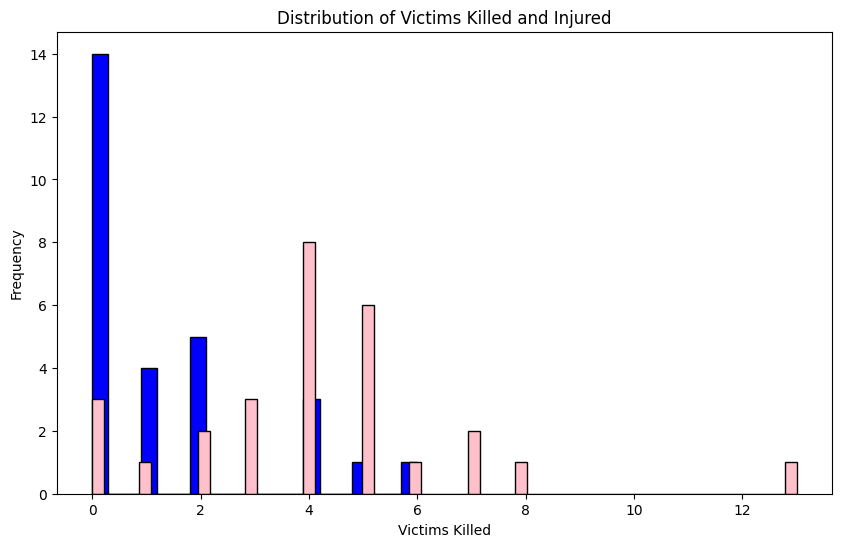

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(ca_df['Victims Killed'], bins=20, color='blue', edgecolor='black')
plt.hist(ca_df['Victims Injured'], bins=60, color='pink', edgecolor='black')
plt.title('Distribution of Victims Killed and Injured')
plt.xlabel('Victims Killed')
plt.ylabel('Frequency')
plt.show()

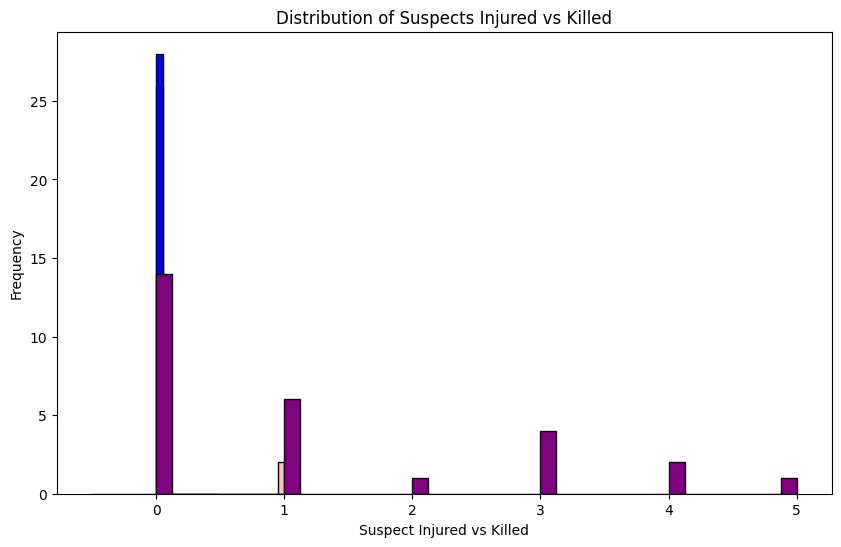

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(ca_df['Suspects Injured'], bins=20, color='pink', edgecolor='black')
plt.hist(ca_df['Suspects Killed'], bins=20, color='blue', edgecolor='black')
plt.hist(ca_df['Suspects Arrested'], bins=40, color='purple', edgecolor='black')
plt.title('Distribution of Suspects Injured vs Killed')
plt.xlabel('Suspect Injured vs Killed')
plt.ylabel('Frequency')
plt.show()

Now overtime we can see how CA has been affected overtime. Has gun violence increased overtime?

Text(0, 0.5, 'Victims Killed and Injured')

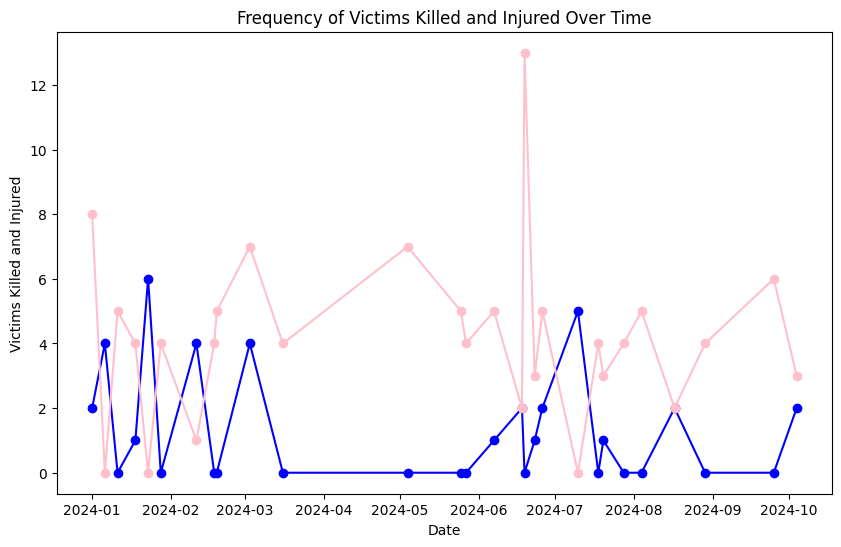

In [26]:
#graph the frequency in CA through out 2024
plt.figure(figsize=(10, 6))
plt.plot(ca_df['Incident Date'], ca_df['Victims Killed'], marker='o', linestyle='-', color='blue')
plt.plot(ca_df['Incident Date'], ca_df['Victims Injured'], marker='o', linestyle='-', color='pink')
plt.title('Frequency of Victims Killed and Injured Over Time')
plt.xlabel('Date')
plt.ylabel('Victims Killed and Injured')

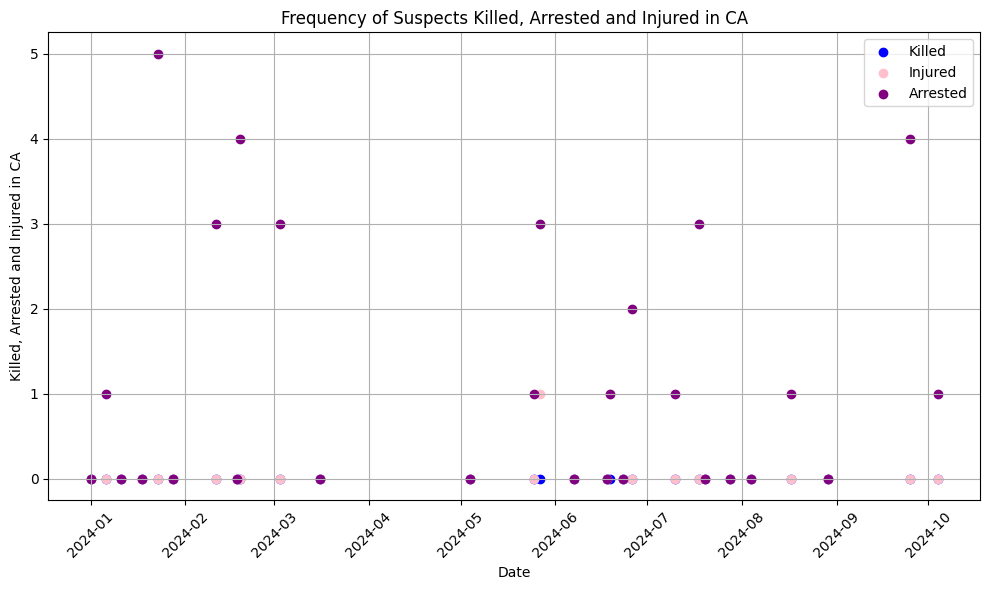

In [27]:
#graph the frequency in CA through out 2024
plt.figure(figsize=(10, 6))
plt.scatter(ca_df['Incident Date'], ca_df['Suspects Killed'], marker='o', linestyle='-', color='blue')
plt.scatter(ca_df['Incident Date'], ca_df['Suspects Injured'], marker='o', linestyle='-', color='pink')
plt.scatter(ca_df['Incident Date'], ca_df['Suspects Arrested'], marker='o', linestyle='-', color='purple')
plt.title('Frequency of Suspects Killed, Arrested and Injured in CA')
plt.ylabel('Killed, Arrested and Injured in CA')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(['Killed', 'Injured', 'Arrested'])
plt.grid(True)
plt.tight_layout()
plt.show()

I changed the graph to really see how the suspects were affected in each incident because Line plotting was very distracting to me with this infromation.



In [28]:
#corr_matrix = numeric_df.corr()

# Create the heatmap
#plt.figure(figsize=(10, 8))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Heatmap')
#plt.show()

In [33]:
import plotly.express as px

fig = px.density_mapbox(
    ca_df,
    lat='Latitude',  # latitude
    lon='Longitude',  #longitude
    hover_name='City',  #'City' or any relevant column for hover information
    hover_data=['State', 'Victims Killed', 'Victims Injured'],
    #color='Victims Killed',
    color_continuous_scale='Viridis',
    zoom=5,
    title='Incident Locations in California',
    radius=10

)

#map
fig.update_layout(mapbox_style='open-street-map')

#plot
fig.show()

From the graph of California above, we can see that many of the shootings are concentrated between the Bay Area in the north and Los Angeles. I find that particularly interesting, and it seems that the number of victims also plays a significant role in the dataset. I would consider this dataset to primarily represent mass shootings, those affecting more than three victims.

Conclusion: When I originally decided to examine shootings in California for 2024, I aimed to confirm my hypothesis that California has a disproportionately high number of shootings compared to other states. This is not solely due to its large population.

However, there is a significant issue with this data, especially from someone who lives in the state. States are no longer required to report crimes if they choose not to, and as a result, many crimes are no longer being reported because people no longer trust the District Attorney's office to prosecute crimes following arrests.

The ca_df, showing only 28 instances of gun violence in California from January 2024 to October 2024, indicates extreme underreporting, especially from someone who personally lives in California and has a husband working at a police station. I would suggest implementing third-party verification with each police department to confirm whether they would report the crimes.

After conducting this exploratory data analysis (EDA) of gun violence, I question the validity of my findings, considering my personal experience living in California, compared to a third-party organization. Even though California ranks second for gun violence, there should likely be far more reported incidents.

Sources:

https://www.gunviolencearchive.org/
https://www.nssf.org/articles/america-has-a-crime-reporting-problem/